<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/Lesson1_cats_dogs_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import untar_data,URLs

data = untar_data(URLs.PETS)

In [3]:
data.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_images = data/"images"

In [0]:
from fastai.vision import get_image_files

filenames = get_image_files(path_images)

In [12]:
filenames[0]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_51.jpg')

In [0]:
from fastai.vision import ImageDataBunch
data_bunch = ImageDataBunch.from_name_re(path_images,filenames,r'/([^/]+)_\d+.jpg$',size=224)

In [20]:
from fastai.vision import imagenet_stats
data_bunch.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russian_Blue,american_pit_bull_terrier,english_cocker_spaniel,Abyssinian,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,newfoundland,shiba_inu,Egyptian_Mau,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [21]:
from fastai.vision import cnn_learner
from fastai.metrics import error_rate
from fastai.vision import models

learner = cnn_learner(data_bunch,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [24]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.308967,0.348037,0.121110,01:01
1,0.512530,0.277035,0.090663,01:00
2,0.273793,0.249471,0.079838,01:00
3,0.182722,0.237040,0.068336,01:00


In [25]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


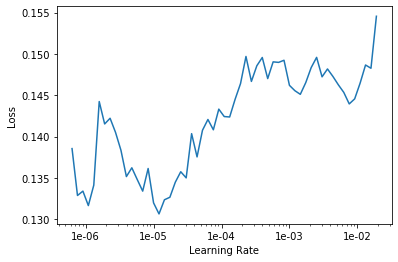

In [26]:
learner.recorder.plot()

In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

In [29]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.643274,0.389628,0.133288,01:01


In [30]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


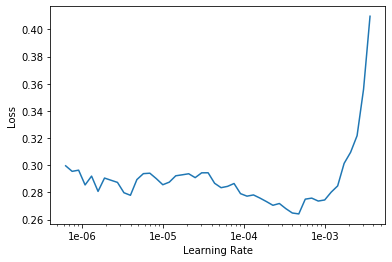

In [31]:
learner.recorder.plot()

In [32]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russian_Blue,american_pit_bull_terrier,english_cocker_spaniel,Abyssinian,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,newfoundland,shiba_inu,Egyptian_Mau,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1):

In [0]:
learner.unfreeze()

In [34]:
learner.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.137426,0.229898,0.072395,01:01
1,0.110767,0.229401,0.065629,01:00
